# Esempi di approssimazioni con le B-Spline Gerarchiche

In [41]:
from Curve_Fitting import Model
from HB_Spline import HB_Spline
from B_Spline import B_Spline
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(1304)

Per la creazione delle B-spline gerarchiche abbiamo bisogno di una B-spline madre.

In [42]:
base  = B_Spline(
        knots=np.linspace(0,10,5+1),
        order=3
    )

hb = HB_Spline(base)

Per i vari esempi useremo sempre lo stesso ordine della base, ma eventualmente cambieremo il vettore esteso dei nodi. 
> Le basi possono essere definite in un intervallo arbitrario e non è necessario che coincidano con il dominio della funzione da approssimare. Tuttavia è più comodo durante la fase di rifinitura che i domini coincidano.

Per approssimare le varie funzioni dobbiamo risolvere il problema dei minimi quadrati, più precisamente dobbiamo risolvere il sistema sovradeterminato $$A\underline{x} = \underline{d}$$ che non ha soluzione in senso classico.

La matrice $A$ è detta matrice di collocamento, ovvero la matrice composta dalle basi valutate nelle ascisse di valutazione ad esclusione di quelle valutate nei nodi ausiliari. In altri contesti viene chiamata anche matrice di costruzione o di design. Nel nostro caso usiamo la base delle HB-sline e B-spline, ma si può usare una qualsiasi base, come quella delle potenze. Naturalmente le prestazioni e accuratezza variano in base al contesto.

Il vettore $\underline{d}$ sono i dati e il vettore incognito $\underline{x}$ sono i punti di controllo che ci permettono di approssimare i dati.

Il sistema viene risolto utilizzando la fattorizzazione QR.
Tale risoluzione è implementato nella classe ```Model``` nel modulo [Curve_Fitting.py](/Curve_Fitting.py)

## Approssimazione di una retta

Iniziamo da un esempio molto semplince e proviamo ad approssimare la funzione $y = x$

Generiamo i dati aggiungendo un errore casuale

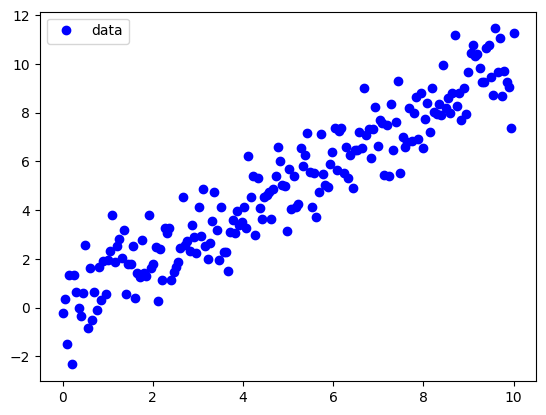

In [43]:
samples = np.shape(
    base.compute_base().get_collocation_matrix()
)[1]

x = np.linspace(0, 10, samples)
y= x + np.random.normal(0, 1, samples)

data = np.matrix([x, y]).T

plt.plot(x, y, "bo", label="data")
plt.legend(loc="best")

Adesso calcoliamo un'approssimazione della funzione generatrice e per farlo utilizziamo la classe ```Model```. Il costruttore necessita di un oggetto HB-spline e una matrice dei dati, che nel nostro caso, utilizzando la nomenclatura di numpy, sono un ```ndarray```, con $n = 2$. 

MSE:1.042027e+00


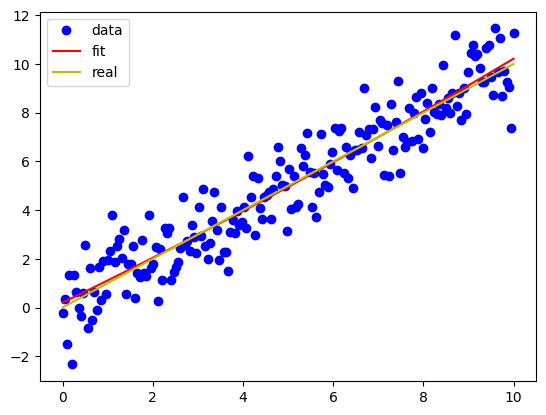

In [44]:
model = Model(
    base=hb,
    data=data
).fit()

model.plot()
plt.plot(x, x, "y-", label="real")
plt.legend(loc="best")

In questo caso si nota un'approssimazione soddisfacente che non necessita di raffinamento.

Giocanto con il vettore esteso dei nodi e l'ordine della base, si possono avere fit migliori o peggiori.

Ad esempio se siamo troppo generosi con la scelta dell'*ordine* e degli *intervalli* inizieremo a modellare il rumore al posto della funzione generatrice.

Ci possiamo accorgere "ad occhio" che siamo in **overfitting** se la curva presenta varie ondulature, come si può vedere nell'esempio seguente.

MSE:9.315689e-01


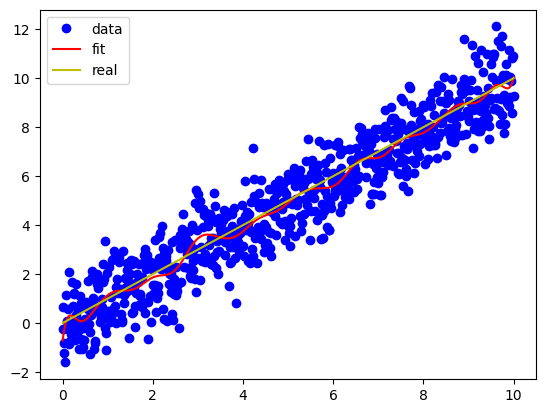

In [45]:
base  = B_Spline(
        knots=np.linspace(0,10,30+1),
        order=5
    )

hb = HB_Spline(base)

samples = np.shape(base.compute_base().get_collocation_matrix())[1]

x = np.linspace(0, 10, samples)
y= x + np.random.normal(0, 1, samples)

data = np.matrix([x, y]).T

model = Model(
    base=hb,
    data=data
).fit()

model.plot()
plt.plot(x, x, "y-", label="real")
plt.legend(loc="best")


## Approssimazione di una parabola

Vediamo ora un esempio un po' piú complesso.
Supponiamo di voler approssimare i seguenti dati

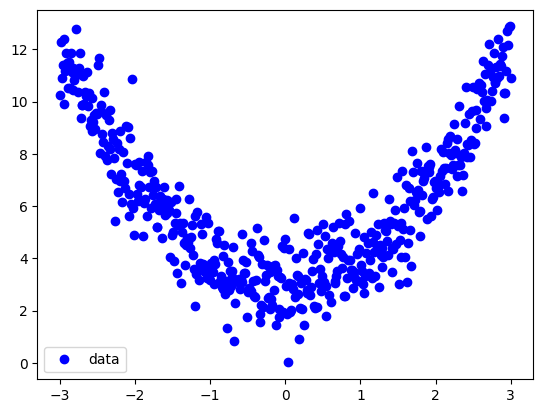

In [46]:
base  = B_Spline(
    knots=np.linspace(-3,3,8+1),
    order=3
)

hb = HB_Spline(base)
    
samples = np.shape(base.compute_base().get_collocation_matrix())[1]

x = np.linspace(-3, 3, samples)
y_real = 3 + np.power(x,2)
y = np.random.normal(3 + np.power(x,2), 1, samples)

data = np.matrix([x, y]).T

plt.plot(x,y , "bo", label="data")
plt.legend(loc="best")
plt.show()

Vediamo come l'algoritmo approssima questa funzione.

MSE:9.230662e-01


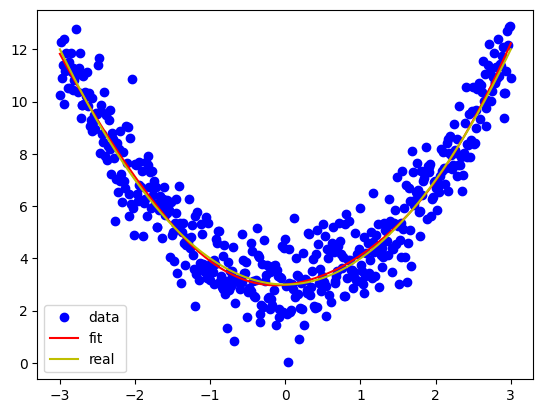

In [47]:
model = Model(
    base=hb,
    data=data
).fit()

model.plot()
plt.plot(x, y_real, "y-", label="real")
plt.legend(loc="best")

Come possiamo vedere, con un ordine basso e con pochi nodi siamo riusciti ad avere un'approssimazione quasi perfetta della funzione generatrice.

Tuttavia è una funzione molto semplice, quindi adesso ne vedremo di più complesse.

## Approssimazione del seno
Vediamo ora come se la cava l'algoritmo nell'approssimazione di una funzione trigonometrica.

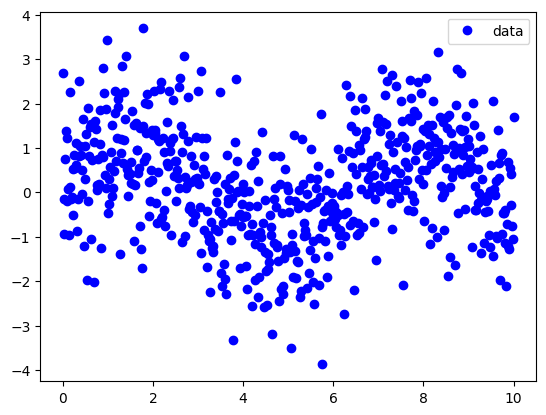

In [48]:
base  = B_Spline(
    knots=np.linspace(0,10,10+1),
    order=3
)

hb = HB_Spline(base)
    
samples = np.shape(base.compute_base().get_collocation_matrix())[1]

x = np.linspace(0, 10, samples)
y_real = np.sin(x)
y= np.random.normal(np.sin(x),1,samples)

data = np.matrix([x, y]).T

plt.plot(x,y , "bo", label="data")
plt.legend(loc="best")
plt.show()

## 

MSE:1.092578e+00


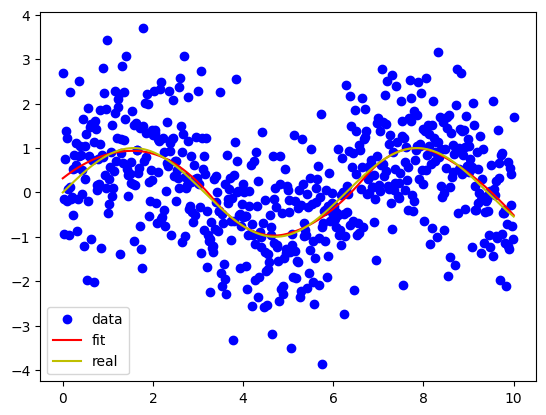

In [49]:
model = Model(
    base=hb,
    data=data
).fit()

model.plot()
plt.plot(x, y_real, "y-", label="real")
plt.legend(loc="best")

L'approssimazione non è soddisfacente, quindi proviamo ad effettuare una rifinitura nel range $(1,9)$ tramite il metodo `refine` della classe `Model`.

MSE:1.085962e+00


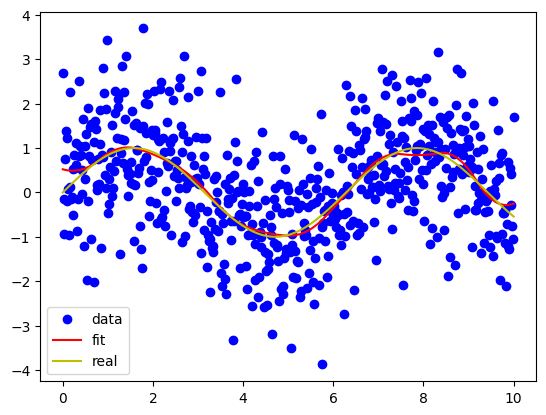

In [50]:
model.refine((2,8)).plot()
plt.plot(x, y_real, "y-", label="real")
plt.legend(loc="best")

Abbiamo raffinato troppo e siamo andati in **overfitting**, questo è dovuto anche alla **mancanza** della proprità di *partizione dell'unità* delle HB-spline.

## Approssimazione della somma di seni
Proviamo adesso ad approssimara una funzione ancora più complessa ovvero $\sin(2x) + \sin(3x)$

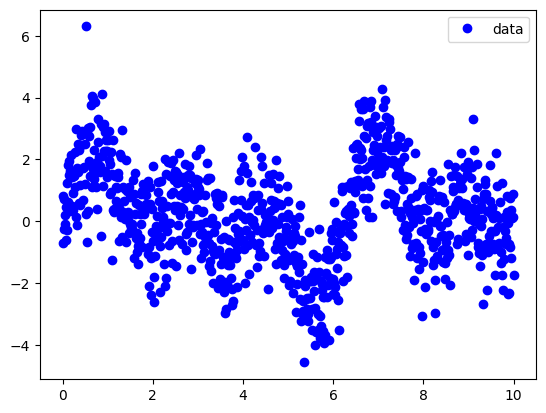

In [51]:
base  = B_Spline(
    knots=np.linspace(0,10,30+1),
    order=3
)

hb = HB_Spline(base)
    
samples = np.shape(base.compute_base().get_collocation_matrix())[1]

x = np.linspace(0, 10, samples)
y_real = np.sin(x) + np.sin(2 * x) + np.sin(3 * x)
y = y_real + np.random.normal(0, 1, samples)

data = np.matrix([x, y]).T
plt.plot(x,y , "bo", label="data")
plt.legend(loc="best")
plt.show()

MSE:1.027357e+00


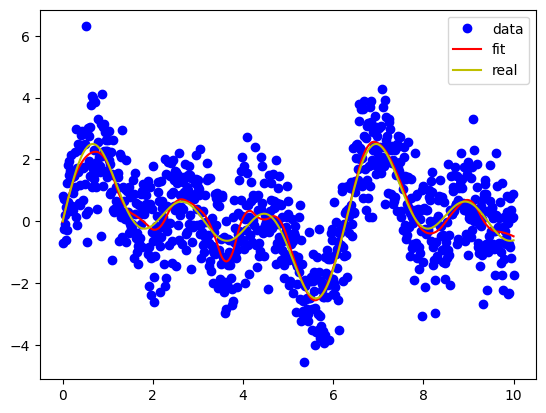

In [52]:
model = Model(
    base=hb,
    data=data
).fit()

model.plot()
plt.plot(x, y_real, "y-", label="real")
plt.legend(loc="best")

Per una funzione così complessa possiamo anche accontentarci, rifinire o aumentare i nodi porterebbe ad **overfitting**.

MSE:1.019765e+00


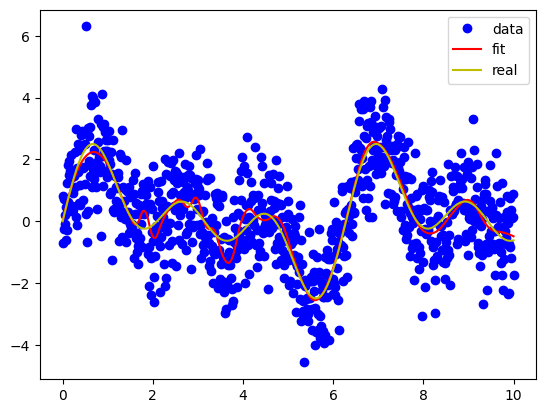

In [53]:
model.refine((2,4))
model.plot()
plt.plot(x, y_real, "y-", label="real")
plt.legend(loc="best")

## Funzione di runge

La funzione di Runge è di particolare interesse durante l'approssimazione e interpolazione, presenta un aumento dell'errore in prossimità degli estremi se si aumenta il grado della base delle potenze. Questo fenomento si presenta con le ascisse di valutazione equidistanti come abbiamo noi. Vediamo come si comporta l'algoritmo. Il vantaggio di usare le base delle B-spline è che non dobbiamo aumentare il grado se vogliamo una maggiore accuratezza.

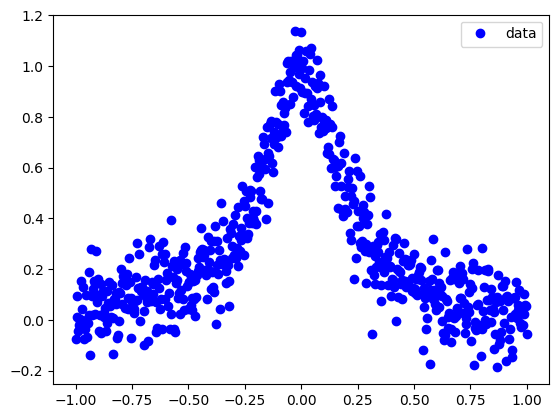

In [54]:
base  = B_Spline(
    knots=np.linspace(-1,1,10+1),
    order=3
)

hb = HB_Spline(base)
    
samples = np.shape(base.compute_base().get_collocation_matrix())[1]


def runge_function(x):
    return 1 / (1 + 25 * x**2)

x = np.linspace(-1, 1, samples)
y_real = runge_function(x)
y = y_real + np.random.normal(0, 0.1, len(x))

data = np.matrix([x, y]).T
plt.plot(x,y , "bo", label="data")
plt.legend(loc="best")
plt.show()

MSE:1.625178e-02


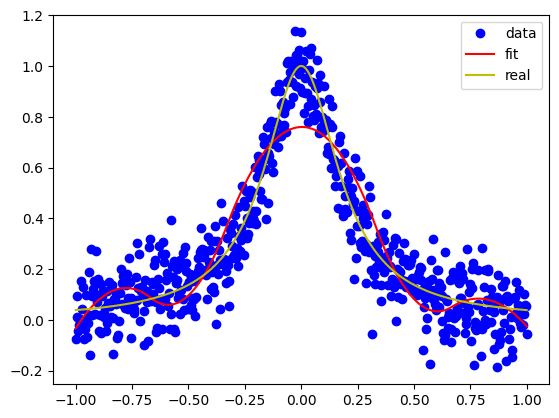

In [55]:
model = Model(
    base=hb,
    data=data
).fit()

model.plot()
plt.plot(x, y_real, "y-", label="real")
plt.legend(loc="best")

La prima approssimazione lascia un po' a desiderare, ma proviamo a rifinire nei punti più critici, ovvero l'intervallo $(-0.25,0.25)$

MSE:9.213066e-03


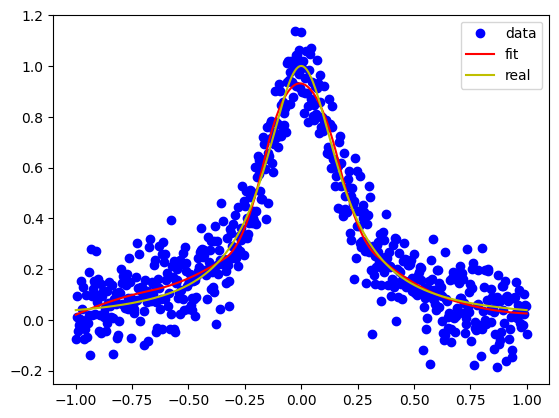

In [56]:
model.refine((-.25,0.25)).plot()
plt.plot(x, y_real, "y-", label="real")
plt.legend(loc="best")

L'approssimazione è nettamente migliorata dopo la rifinitura.

Effettuiamo un'ulteriore rifinitura nella "punta" della funzione, cioè in $(-0.1,0.1)$

MSE:8.967597e-03


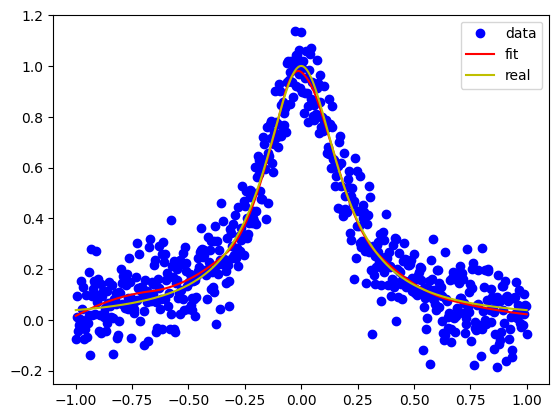

In [57]:
model.refine((-0.1,0.1)).plot()
plt.plot(x, y_real, "y-", label="real")
plt.legend(loc="best")

L'algoritmo approssima quasi perfettamente la funzione di runge.

In [58]:
base  = B_Spline(
    knots=[-1,-1,-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1,1,1],
    order=3
)    
samples = np.shape(base.compute_base().get_collocation_matrix())[1]

def runge_function(x):
    return 1 / (1 + 25 * x**2)

x = np.linspace(-1, 1, samples)
y_real = runge_function(x)
y = y_real + np.random.normal(0, 0.1, len(x))

data = np.matrix([x, y]).T
model = Model(
    base=base,
    data=data
).fit()

model.iterative_refine().plot()
plt.plot(x, y_real, "y-", label="real")
plt.legend(loc="best")



AttributeError: 'matrix' object has no attribute 'get_collocation_matrix'

## Funzione di runge con tanto rumore
Proviamo adesso ad approssimare la stessa funzione, ma questa volta con rumore notevolmente aumentato.

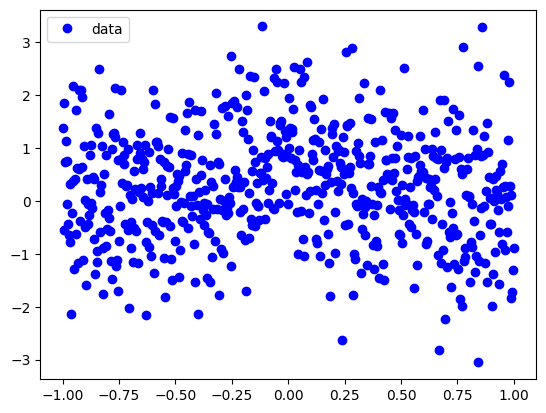

In [ ]:
base  = B_Spline(
    knots=np.linspace(-1,1,10+1),
    order=3
)

hb = HB_Spline(base)

samples = np.shape(base.compute_base().get_collocation_matrix())[1]

def runge_function(x):
    return 1 / (1 + 25 * x**2)

x = np.linspace(-1, 1, samples)
y_real = runge_function(x)
    
y = y_real + np.random.normal(0, 1, len(x))

data = np.matrix([x, y]).T

plt.plot(x,y , "bo", label="data")
plt.legend(loc="best")
plt.show()


MSE = 1.0356816429103048


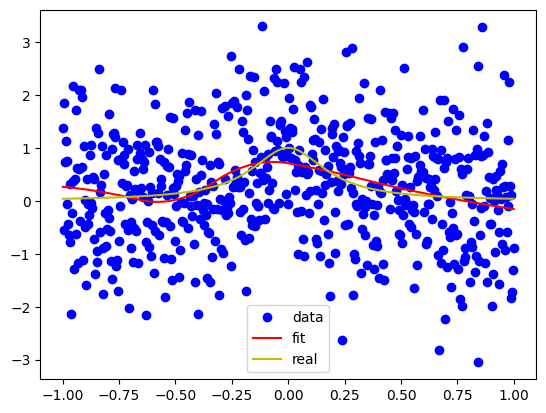

In [ ]:
model = Model(
    base=hb,
    data=data
).fit()

model.plot()
plt.plot(x, y_real, "y-", label="real")
plt.legend(loc="best")

cerchiamo di essere più precisi nella primametà dell'intervallo

MSE = 1.0248925808465497


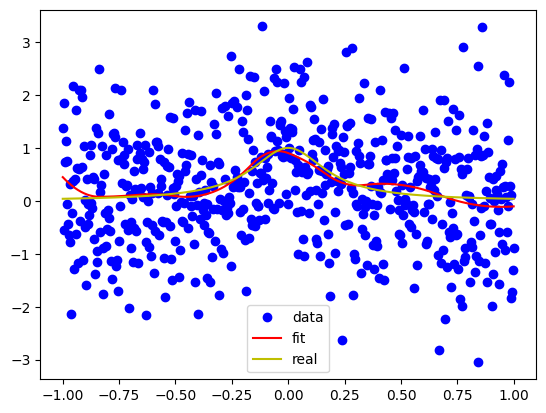

In [ ]:
model.refine((-0.7,0.25)).plot()
plt.plot(x, y_real, "y-", label="real")
plt.legend(loc="best")

proviamo una rifinitura nella zona centrale

MSE = 1.023082879657842


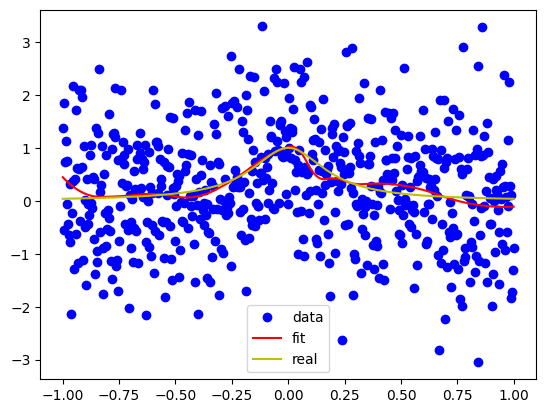

In [ ]:
model.refine((0,0.25)).plot()
plt.plot(x, y_real, "y-", label="real")
plt.legend(loc="best")

Tenendo conto che i dati sembrano quasi rumore casuale, l'approssimazione sembra sufficiente.